# EDA Analysis

After the data cleaning step and placing the data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

* Most common words - find these and create word clouds
* Size of vocabulary - look number of unique words and also how quickly someone speaks
* Amount of profanity - most common terms

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## Most common words

In [3]:
# Let's first Read in the document-term matrix. Reading in the pickle file
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


this is called document term matix 

**Why did I transpose?** 


**What format is the data now?** 

In [4]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))  ## zip combines two list

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('oh', 21),
  ('wanna', 21),
  ('husband', 20),
  ('got', 19),
  ('time', 19),
  ('right', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 14),
  ('hes', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13),
  ('theyre', 12),
  ('work', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('youre', 19),
  ('tell', 19),
  ('grandma', 18),
  ('right', 18),
  ('thing', 17),
  ('think', 17),
  ('time', 17),
  ('school', 16),
  ('yeah', 16),
  ('jokes', 16),
  ('did', 16),
  ('good', 16),
  ('gonna', 15),
  ('baby', 15),
  ('okay', 15),
  ('ive', 15)],
 

In [5]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, gotta, oh, wanna
---
anthony
im, like, know, dont, joke, got, said, thats, anthony, just, day, say, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, im, think, love, bo, just, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, said, just, im, shit, people, didnt, dont, ahah, time, thats, fuck, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, think
---
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, time, hey, got
---
louis
like, just, know, dont, thats, youre, im, life, people, thing, hes, gonna, cause, theres
---
mike
like, im, know, said, just, dont, think, tha

**What can you tell from looking at the top 15 words?**

In [6]:
# By looking at the most common top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'oh',
 'wanna',
 'husband',
 'got',
 'time',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'god',
 'hes',
 'need',
 'yeah',
 'tell',
 'theyre',
 'work',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'youre',
 'tell',
 'grandma',
 'right',
 'thing',
 'think',
 'time',
 'school',
 'yeah',
 'jokes',
 'did',
 'good',
 'gonna',
 'baby',
 'okay',
 'ive',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'think',
 'fuck',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'doing',
 'know',
 'like',
 'im',
 'think',
 'love',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'said',
 'eye',
 'peop

In [10]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common() #Counter is a useful way to check how many documents have that word

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('time', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('little', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('dude', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('b

### stopword removal
You can see that all 12 comedian have "like", "im", "know".... as their top most common words.
So these words aren't really meaningful.
Let's put a threshold to say that if more than half the comedians (say half of the documents) have one of these words as the most common words, then I am going to consider that word as a stop word.
Let's add those in the stopword list.

In [11]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think',
 'yeah',
 'said']

**Practical example**

Check this paper, (section on Stop-word Removal) to see how this technique is used in practice for a data science project on Twitter.
[CREDBANK: A Large-Scale Social Media Corpus
with Associated Credibility Annotations](http://faculty.washington.edu/tmitra/public/papers/credbank-twitter.pdf)

In [12]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text #text contains the stopword list for sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words) #adding my new stopword list into the already existing English stopword in sklearn

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words) #new count vectorizer object that includes new stop words
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index #new document-term matrix that excludes those stopwords

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

#### Visualize the top words
Let's make some word clouds! But first install wordcloud
https://pypi.org/project/wordcloud/

But first install wordcloud

Terminal / Anaconda Prompt: ``conda install -c conda-forge wordcloud``

In [16]:
#!pip install wordcloud

     |████████████████████████████████| 220 kB 8.4 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158037 sha256=551600894c2fa294d60a0416a9e289b424613a5aa12bcdf37b5309596515614c
  Stored in directory: /Users/stlp/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [17]:
# Let's make some word clouds! 
from wordcloud import WordCloud

#create word cloudn object
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [10]:
data

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


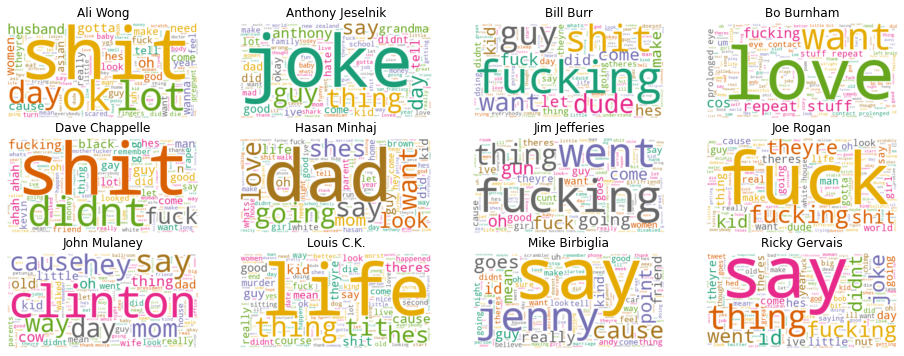

In [18]:
# plotting the word cloud object
plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

**What are some insights you can draw**?

* Does the data make sense?
* Can we further clean the data (maybe with additional stop words)?
* What are some initial findings? How are the comedians different?


-Its funny that Hasan mentions about his parents so many times
-POC mention about their race: Ali wong - asian ; Dave - Black ; Hasan - Brown ; which makes sense
-I think we can add "say" to the stop word list

# Number of words

Find the number of unique words used by each comedian

In [19]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
3,Bo Burnham,1271
6,Jim Jefferies,1313
0,Ali Wong,1341
4,Dave Chappelle,1385
8,John Mulaney,1399
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1553


In [20]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1271,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1385,4065,67,60.671642
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1399,4019,62,64.822581
5,Hasan Minhaj,1553,4774,73,65.397260


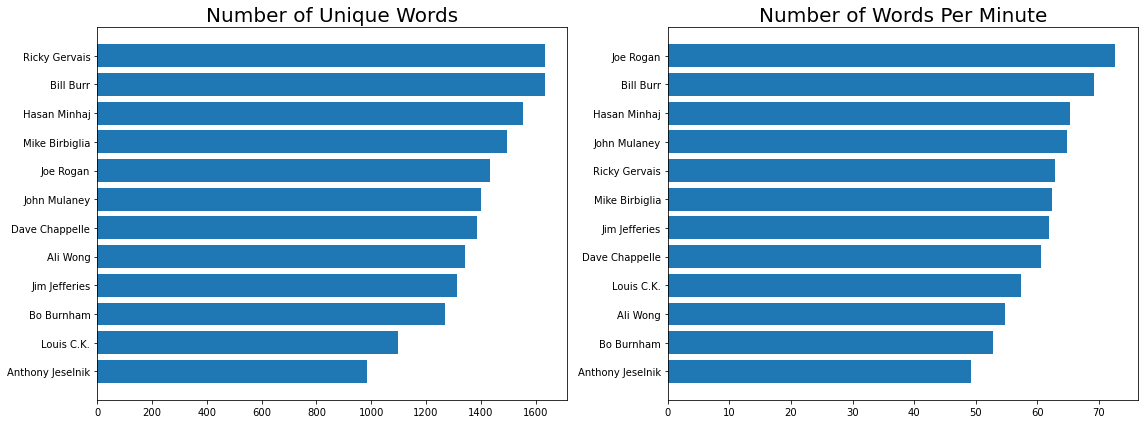

In [21]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

**What can you infer?**

**Findings**

* **In terms of Vocabulary??**


* **In terms of Talking Speed??**


## Amount of Profanity

In [7]:
#revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('time', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('little', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('dude', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('b

In [9]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,11,34
anthony,9,9
bill,36,63
bo,15,6
dave,34,46
hasan,16,15
jim,37,20
joe,66,40
john,2,6
louis,15,25


**What are some other ways you can actually get a list of profanity words (or swear words)**

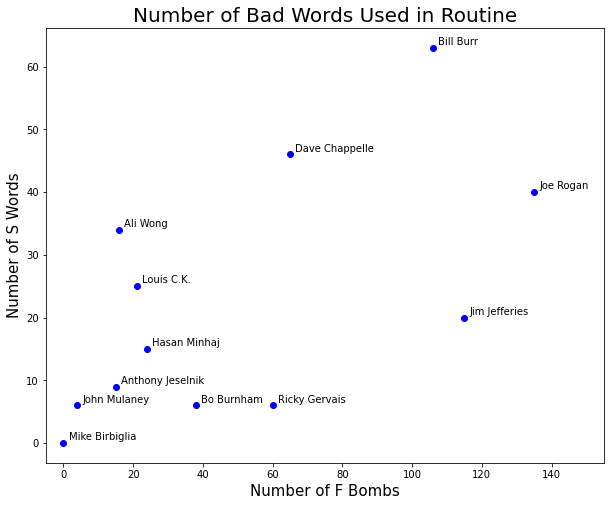

In [24]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

**What can you infer?**

**LAB Part 2**

# Topic Modeling

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

Here we will cover steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide 
* (1) a document-term matrix and 
* (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. 

If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 

In [3]:
# make sure that you have read our document-term matrix
data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [4]:
# Import the necessary modules for LDA with gensim. 
# Install necessary modules. May take a while
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [10]:
import pickle

# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [11]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.009*"fucking" + 0.008*"shit" + 0.007*"fuck" + 0.005*"theyre" + 0.005*"thing" + 0.005*"say" + 0.005*"didnt" + 0.005*"cause" + 0.005*"day" + 0.005*"hes"'),
 (1,
  '0.005*"say" + 0.005*"want" + 0.005*"going" + 0.005*"oh" + 0.005*"love" + 0.004*"fucking" + 0.004*"hes" + 0.004*"id" + 0.004*"really" + 0.003*"didnt"')]

In [12]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.008*"fucking" + 0.007*"theyre" + 0.007*"shit" + 0.007*"fuck" + 0.006*"theres" + 0.005*"hes" + 0.005*"say" + 0.005*"cause" + 0.005*"life" + 0.005*"thing"'),
 (1,
  '0.008*"fucking" + 0.006*"want" + 0.006*"going" + 0.005*"say" + 0.005*"love" + 0.005*"day" + 0.005*"shit" + 0.005*"fuck" + 0.005*"oh" + 0.004*"good"'),
 (2,
  '0.006*"didnt" + 0.006*"shit" + 0.004*"man" + 0.004*"good" + 0.004*"oh" + 0.004*"ahah" + 0.004*"fuck" + 0.004*"fucking" + 0.004*"clinton" + 0.004*"say"')]

In [13]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.010*"fucking" + 0.007*"fuck" + 0.006*"oh" + 0.006*"shit" + 0.006*"theyre" + 0.005*"say" + 0.005*"went" + 0.005*"going" + 0.005*"didnt" + 0.005*"hes"'),
 (1,
  '0.006*"thing" + 0.006*"say" + 0.006*"cause" + 0.006*"day" + 0.005*"life" + 0.005*"good" + 0.005*"little" + 0.005*"really" + 0.004*"didnt" + 0.004*"way"'),
 (2,
  '0.011*"fucking" + 0.010*"shit" + 0.006*"dude" + 0.006*"fuck" + 0.006*"want" + 0.005*"hes" + 0.005*"did" + 0.005*"guy" + 0.005*"didnt" + 0.005*"make"'),
 (3,
  '0.010*"dad" + 0.007*"going" + 0.006*"want" + 0.006*"love" + 0.005*"shes" + 0.005*"hasan" + 0.005*"say" + 0.004*"life" + 0.004*"mom" + 0.004*"oh"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [14]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [15]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,whats up davis whats up im home i had to bri...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,armed with boyish charm and a sharp wit the fo...
louis,introfade the music out lets roll hold there l...


In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

#if you get an error saying nltk.download('averaged_perceptron_tagger'), you need to download to make this function run

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/stlp/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,transcript
ali,ladies gentlemen stage ali hi thank hello na s...
anthony,thank thank people i em i francisco city world...
bill,thank thank pleasure georgia area oasis i june...
bo,macdonald farm e i o farm pig e i i snort macd...
dave,jokes living stare work profound train thought...
hasan,whats davis whats home i netflix la york i son...
jim,ladies gentlemen stage mr jim jefferies thank ...
joe,ladies gentlemen joe fuck thanks phone fuckfac...
john,charm wit snl writer john mulaney marriage bee...
louis,music lets lights lights thank i i place place...


In [18]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abortion,abortions,abuse,...,yummy,ze,zealand,zee,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,2,0,0,...,0,0,10,0,0,0,0,0,0,0
bill,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [20]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.006*"stuff" + 0.006*"point" + 0.005*"bo" + 0.005*"way" + 0.005*"cause" + 0.005*"repeat" + 0.004*"kind" + 0.004*"night" + 0.004*"eye" + 0.004*"id"'),
 (1,
  '0.010*"thing" + 0.010*"shit" + 0.009*"day" + 0.008*"life" + 0.008*"man" + 0.008*"hes" + 0.007*"fuck" + 0.007*"way" + 0.006*"cause" + 0.006*"lot"')]

In [21]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"day" + 0.009*"thing" + 0.008*"cause" + 0.008*"life" + 0.007*"way" + 0.007*"lot" + 0.006*"dad" + 0.006*"hes" + 0.006*"guy" + 0.006*"shes"'),
 (1,
  '0.012*"shit" + 0.010*"man" + 0.010*"fuck" + 0.008*"thing" + 0.008*"hes" + 0.007*"gon" + 0.007*"life" + 0.007*"guy" + 0.006*"years" + 0.006*"way"'),
 (2,
  '0.010*"stuff" + 0.010*"bo" + 0.009*"repeat" + 0.008*"eye" + 0.007*"contact" + 0.006*"man" + 0.005*"brain" + 0.005*"story" + 0.005*"cos" + 0.004*"comedy"')]

In [22]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.012*"joke" + 0.010*"day" + 0.009*"thing" + 0.007*"things" + 0.006*"hes" + 0.006*"stuff" + 0.006*"years" + 0.006*"way" + 0.006*"jokes" + 0.005*"man"'),
 (1,
  '0.014*"shit" + 0.010*"day" + 0.010*"man" + 0.009*"thing" + 0.009*"fuck" + 0.008*"guy" + 0.008*"lot" + 0.008*"women" + 0.007*"hes" + 0.007*"cause"'),
 (2,
  '0.016*"life" + 0.012*"thing" + 0.010*"hes" + 0.008*"cause" + 0.008*"course" + 0.007*"kids" + 0.007*"tit" + 0.007*"guy" + 0.006*"shit" + 0.006*"way"'),
 (3,
  '0.009*"dad" + 0.008*"house" + 0.008*"way" + 0.008*"cause" + 0.007*"life" + 0.007*"shes" + 0.007*"man" + 0.006*"day" + 0.006*"kind" + 0.006*"mom"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)


In [23]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [24]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ladies gentlemen welcome stage ali wong hi wel...
anthony,thank san francisco thank good people surprise...
bill,right thank thank pleasure greater atlanta geo...
bo,old macdonald farm e i i o farm pig e i i snor...
dave,dirty jokes living stare most hard work profou...
hasan,whats davis whats im home i netflix special la...
jim,ladies gentlemen welcome stage mr jim jefferie...
joe,ladies gentlemen joe fuck san francisco thanks...
john,boyish charm sharp wit former snl writer john ...
louis,music lets lights lights thank much i i i nice...


In [25]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abject,able,...,ze,zealand,zee,zeppelin,zero,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,1,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [30]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.006*"joke" + 0.004*"mom" + 0.003*"ass" + 0.003*"jokes" + 0.003*"bo" + 0.003*"clinton" + 0.003*"um" + 0.003*"guns" + 0.002*"repeat" + 0.002*"eye"'),
 (1,
  '0.003*"parents" + 0.003*"ahah" + 0.003*"door" + 0.003*"mom" + 0.003*"hasan" + 0.002*"jenny" + 0.002*"dick" + 0.002*"friend" + 0.002*"love" + 0.002*"son"')]

In [31]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.008*"joke" + 0.004*"jokes" + 0.004*"bo" + 0.003*"repeat" + 0.003*"dead" + 0.003*"stupid" + 0.003*"hell" + 0.003*"eye" + 0.003*"anthony" + 0.003*"comedy"'),
 (1,
  '0.006*"ahah" + 0.005*"jenny" + 0.003*"tit" + 0.003*"friend" + 0.003*"gay" + 0.003*"young" + 0.003*"long" + 0.003*"date" + 0.003*"accident" + 0.003*"parents"'),
 (2,
  '0.007*"mom" + 0.004*"parents" + 0.004*"ass" + 0.004*"clinton" + 0.004*"hasan" + 0.003*"guns" + 0.003*"wife" + 0.003*"class" + 0.003*"son" + 0.003*"movie"')]

In [32]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"stupid" + 0.004*"dick" + 0.004*"texas" + 0.003*"em" + 0.003*"door" + 0.003*"president" + 0.003*"earth" + 0.003*"high" + 0.003*"ones" + 0.003*"religion"'),
 (1,
  '0.005*"joke" + 0.004*"bo" + 0.004*"jenny" + 0.004*"repeat" + 0.003*"guns" + 0.003*"um" + 0.003*"ass" + 0.003*"class" + 0.003*"eye" + 0.003*"youve"'),
 (2,
  '0.006*"mom" + 0.006*"ok" + 0.005*"hasan" + 0.004*"parents" + 0.004*"tit" + 0.004*"husband" + 0.003*"brown" + 0.003*"date" + 0.003*"older" + 0.003*"bike"'),
 (3,
  '0.006*"joke" + 0.005*"ahah" + 0.005*"wife" + 0.005*"mom" + 0.004*"clinton" + 0.004*"mad" + 0.004*"friend" + 0.004*"anthony" + 0.003*"gun" + 0.003*"gay"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [33]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.006*"joke" + 0.005*"bo" + 0.004*"repeat" + 0.004*"guns" + 0.004*"um" + 0.004*"eye" + 0.004*"ass" + 0.003*"contact" + 0.003*"girlfriend" + 0.003*"jokes"'),
 (1,
  '0.005*"mom" + 0.004*"hasan" + 0.003*"parents" + 0.003*"door" + 0.003*"dick" + 0.003*"husband" + 0.003*"stupid" + 0.003*"religion" + 0.003*"ass" + 0.002*"jesus"'),
 (2,
  '0.009*"tit" + 0.006*"ok" + 0.005*"murder" + 0.005*"ha" + 0.005*"date" + 0.005*"older" + 0.005*"worst" + 0.005*"food" + 0.004*"tits" + 0.004*"dog"'),
 (3,
  '0.005*"friend" + 0.005*"ahah" + 0.005*"mom" + 0.005*"joke" + 0.004*"clinton" + 0.004*"parents" + 0.004*"jenny" + 0.004*"wife" + 0.004*"mad" + 0.004*"anthony"')]

Let's see what 4 topics you all got. Do they look meaningful?
* Topic 0: ?
* Topic 1: ?
* Topic 2: ?
* Topic 3: ?

In [34]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'ali'),
 (3, 'anthony'),
 (1, 'bill'),
 (0, 'bo'),
 (3, 'dave'),
 (1, 'hasan'),
 (0, 'jim'),
 (1, 'joe'),
 (3, 'john'),
 (2, 'louis'),
 (3, 'mike'),
 (0, 'ricky')]

**TO TRY**

1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

**Are there ways to use topic modeling for your project to answer any existing RQ or perhaps even new RQs in the future?**